In [1]:
# Remover outliers.
# You can see that flights that have two or more stops programmed or a duration of more than 30 hours.

<h1 style='font-size:40px'> Flight Prices Estimator</h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            This project is intended to build a flight price estimator using Python's Machine Learning resources.
        </li>
        <li> 
            The dataset includes features such as the Airline company responsible for the flight, the cities of departure and destination and the number of stops projected.
        </li>
        <li> 
            The data used was originally found on <a href='https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction'> Kaggle</a>.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Data Import & Analysis</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Most of the data in our hands is categorical. Hence, we'll need to find out a way to treat these informations so our algorithms can use them.
        </li>
    </ul>
</div>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Clean_Dataset.csv', usecols=[i for i in range(1,12)])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<h2 style='font-size:30px'> Searching for NaN's</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Fortunately, all of our columns do not present null values. We do not need to find out a way to treat such kind defect.
        </li>
    </ul>
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


<h2 style='font-size:30px'> Correcting the <em> stops</em> column</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            As <em> stops</em> refers to the quantity of stoppings programmed for the flights, it is reasonable to convert its values to numerical type.
        </li>
    </ul>
</div>

In [4]:
# 'two_or_more' is going to be converted as 2.
df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2}, inplace=True)
df.stops.unique()

array([0, 1, 2])

<h2 style='font-size:30px'> Numerical Values Distribution</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observing the histograms produced, it is visible that one-stop flights compose the majority of the dataset.
        </li>
        <li> 
            The <em> days_left</em> column has a well distributed data.
        </li>
        <li> 
            You can see the number of flights that have two or more stops programmed or a duration above 30 hours is proportionately low; the longest flight record cannot even be seen in the histogram! Maybe removing such cases as exceptions could enhance our models' performance.
        </li>
        <li> 
            From the DataFrame's description, the most expensive price list is above 100,000.00, which is disparate compared with the rest of the flight tickets.
        </li>
    </ul>
</div>

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,12.221021,26.004751,20889.660523
std,0.398106,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.830000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


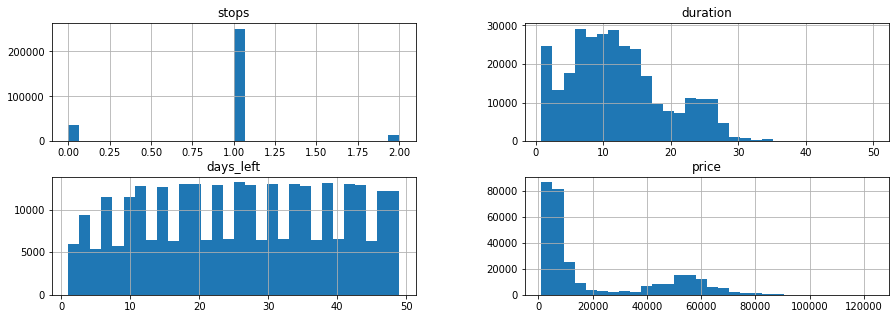

In [5]:
display(df.describe())
df.hist(figsize=(15,5), bins=30);

<h2 style='font-size:30px'> Engendering Train and Test Sets</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            In our sampling, I've chosen to maintain the proportions of the airlines from the dataset.
        </li>
    </ul>
</div>

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)

for train_index, test_index in split.split(df, df.airline):
    train = df.loc[train_index]
    test = df.loc[test_index]

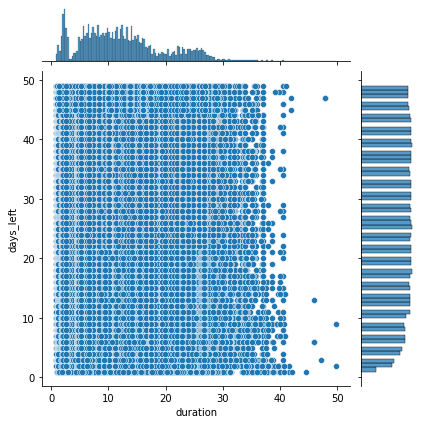

In [7]:
import seaborn as sns

sns.jointplot(data=df, x='duration', y='days_left',kind='scatter' )

In [8]:
! mv /home/veiga/Downloads/archive.zip .

mv: cannot stat '/home/veiga/Downloads/archive.zip': No such file or directory


<p style='color:red'> Montar Introdução.